# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from datetime import datetime

# Import Data

In [3]:
df = pd.read_csv('./data/sidewalk_cafe_inspections.csv').drop(['Unnamed: 0'], axis=1)

In [3]:
df.head()

,CAMIS,DBA,BORO,ZIPCODE,FLAG__Critical,FLAG__Not Critical,SCORE,GRADE,LIC_STATUS,SWC_SQ_FT,...,ZIP_11249,ZIP_11366,ZIP_11368,ZIP_11375,ZIP_11421,ZIP_11432,BRONX,BROOKLYN,MANHATTAN,QUEENS
0,40364958,WHITE HORSE TAVERN,MANHATTAN,10014,22,11,19.437500,1,Active,728.0,...,0,0,0,0,0,0,0,0,1,0
1,40366473,TIO PEPE,MANHATTAN,10014,2,5,9.333333,1,Active,129.0,...,0,0,0,0,0,0,0,0,1,0
2,40370856,OLIVE TREE CAFE & COMEDY CELLAR,MANHATTAN,10012,1,4,5.666667,1,Active,46.0,...,0,0,0,0,0,0,0,0,1,0
3,40372262,LA RIPAILLE RESTAURANT,MANHATTAN,10014,8,5,13.600000,1,Active,129.0,...,0,0,0,0,0,0,0,0,1,0
4,40373912,THE MALT HOUSE,MANHATTAN,10012,8,10,18.000000,1,Active,193.0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
df.shape

(435, 123)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Columns: 123 entries, CAMIS to QUEENS
dtypes: float64(6), int64(112), object(5)
memory usage: 418.1+ KB


# EDA

#### Correlation

In [6]:
# looking for any strongly or moderately correlated pairs
df.corr()[(df.corr() > 0.5) | (df.corr() < -0.5)]

,CAMIS,ZIPCODE,FLAG__Critical,FLAG__Not Critical,SCORE,GRADE,SWC_SQ_FT,SWC_TABLES,SWC_CHAIRS,COMMUNITY_DISTRICT,...,ZIP_11249,ZIP_11366,ZIP_11368,ZIP_11375,ZIP_11421,ZIP_11432,BRONX,BROOKLYN,MANHATTAN,QUEENS
CAMIS,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIPCODE,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.967046,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753545,-0.978530,0.547418
FLAG__Critical,NaN,NaN,1.000000,0.741035,0.594872,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG__Not Critical,NaN,NaN,0.741035,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SCORE,NaN,NaN,0.594872,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRADE,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SWC_SQ_FT,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.830307,0.880763,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SWC_TABLES,NaN,NaN,NaN,NaN,NaN,NaN,0.830307,1.000000,0.943402,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SWC_CHAIRS,NaN,NaN,NaN,NaN,NaN,NaN,0.880763,0.943402,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COMMUNITY_DISTRICT,NaN,0.967046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.575374,-0.960563,0.732819


In [7]:
df.loc[:, 'ZIPCODE':'QUEENS'].corr()[df.loc[:, 'ZIPCODE':'QUEENS'].corr() > 0.5]

,ZIPCODE,FLAG__Critical,FLAG__Not Critical,SCORE,GRADE,SWC_SQ_FT,SWC_TABLES,SWC_CHAIRS,COMMUNITY_DISTRICT,CITY_COUNCIL_DISTRICT,...,ZIP_11249,ZIP_11366,ZIP_11368,ZIP_11375,ZIP_11421,ZIP_11432,BRONX,BROOKLYN,MANHATTAN,QUEENS
ZIPCODE,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.967046,0.957214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753545,NaN,0.547418
FLAG__Critical,NaN,1.000000,0.741035,0.594872,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG__Not Critical,NaN,0.741035,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SCORE,NaN,0.594872,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRADE,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SWC_SQ_FT,NaN,NaN,NaN,NaN,NaN,1.000000,0.830307,0.880763,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SWC_TABLES,NaN,NaN,NaN,NaN,NaN,0.830307,1.000000,0.943402,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SWC_CHAIRS,NaN,NaN,NaN,NaN,NaN,0.880763,0.943402,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COMMUNITY_DISTRICT,0.967046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.884983,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.575374,NaN,0.732819
CITY_COUNCIL_DISTRICT,0.957214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.884983,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.849969,NaN,NaN


In [8]:
#create subset of data for plotting correlation heatmap
df_sub = df[['ZIPCODE', 'FLAG__Critical', 'FLAG__Not Critical', 'SCORE', 'GRADE', 'SWC_SQ_FT', 'SWC_TABLES', 'SWC_CHAIRS', 'COMMUNITY_DISTRICT', 'CITY_COUNCIL_DISTRICT', 'BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS']].copy()

Text(0.5, 1.0, 'Correlation Heatmap of Key Features')

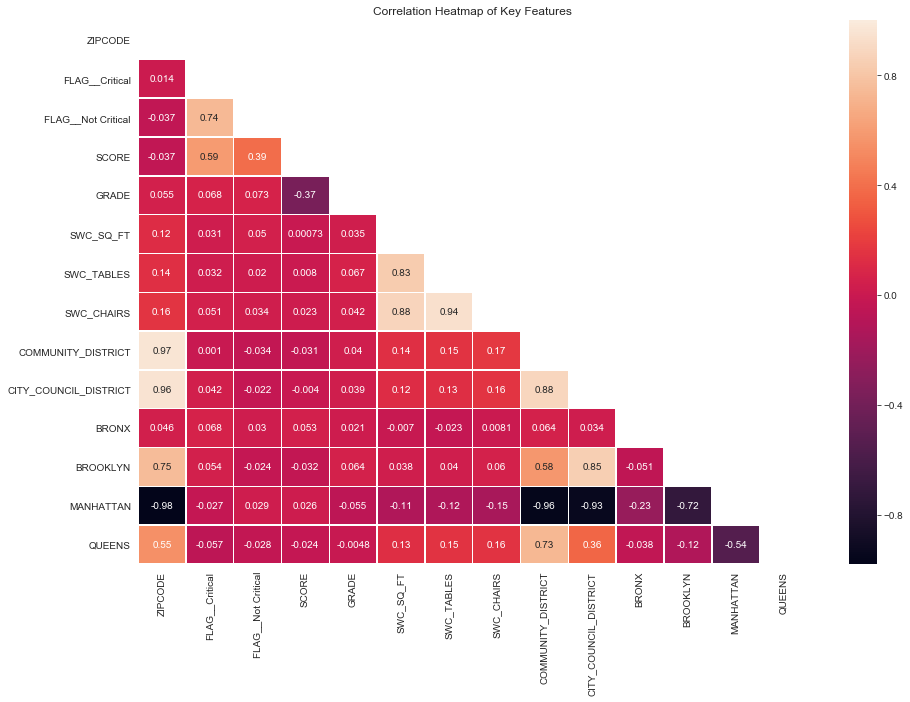

In [9]:
# correlation heatmap of some of the key features in dataframe
plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
mask = np.zeros_like(df_sub.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
corr_heat = sns.heatmap(df_sub.corr(), linewidth=0.5, mask=mask, annot=True)
corr_heat.set_title('Correlation Heatmap of Key Features')

#### Class Imbalance Evaluation

In [10]:
# view value_counts of Grade column (1 = received an A, 0 = did not receive an A)
df.GRADE.value_counts()

1    424
0     11
Name: GRADE, dtype: int64

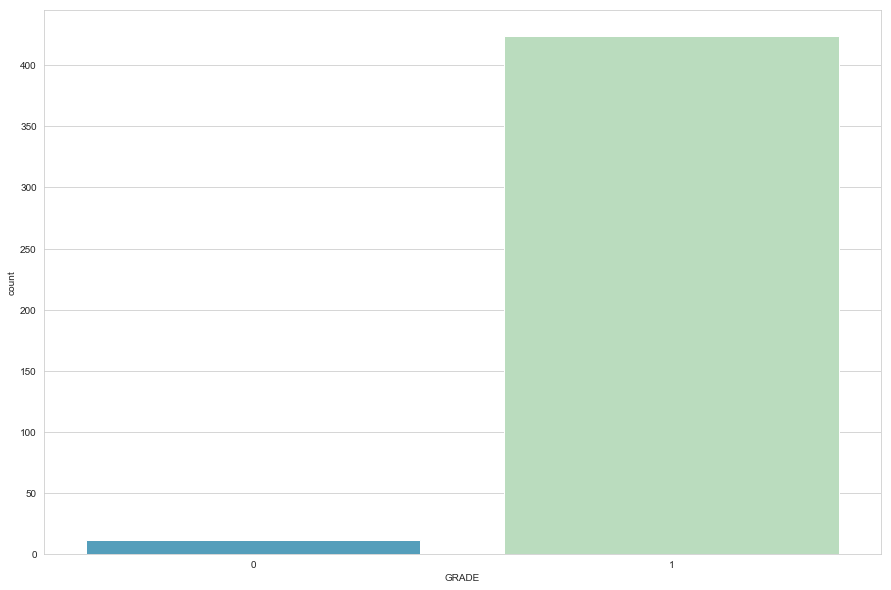

In [11]:
# visualize value counts of target column
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
sns.countplot(x='GRADE',data=df,palette='GnBu_r')

#### Outlier Evaluation

In [15]:
#look at the general statistics of the dataframe
df.describe()

,CAMIS,ZIPCODE,FLAG__Critical,FLAG__Not Critical,SCORE,GRADE,SWC_SQ_FT,SWC_TABLES,SWC_CHAIRS,COMMUNITY_DISTRICT,...,ZIP_11249,ZIP_11366,ZIP_11368,ZIP_11375,ZIP_11421,ZIP_11432,BRONX,BROOKLYN,MANHATTAN,QUEENS
count,4.350000e+02,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,...,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,4.580712e+07,10288.760920,9.126437,7.291954,14.398551,0.974713,240.972414,9.783908,22.071264,158.411494,...,0.009195,0.002299,0.002299,0.013793,0.002299,0.002299,0.016092,0.135632,0.765517,0.082759
std,4.418490e+06,490.330715,5.940963,4.287997,5.607098,0.157177,159.080130,6.728728,14.604683,100.312982,...,0.095561,0.047946,0.047946,0.116766,0.047946,0.047946,0.125974,0.342792,0.424163,0.275834
min,4.036496e+07,10001.000000,1.000000,0.000000,4.666667,0.000000,23.000000,1.000000,3.000000,101.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.140928e+07,10012.000000,5.000000,4.000000,10.633333,1.000000,131.000000,5.000000,12.000000,103.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,5.000075e+07,10024.000000,8.000000,7.000000,13.469388,1.000000,195.000000,8.000000,18.000000,107.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,5.005042e+07,10128.000000,13.000000,10.000000,17.291667,1.000000,305.000000,12.000000,28.000000,112.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.008981e+07,11432.000000,34.000000,25.000000,42.000000,1.000000,1253.000000,52.000000,104.000000,412.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Boxplot of Restaurant Size (Sq Ft)')

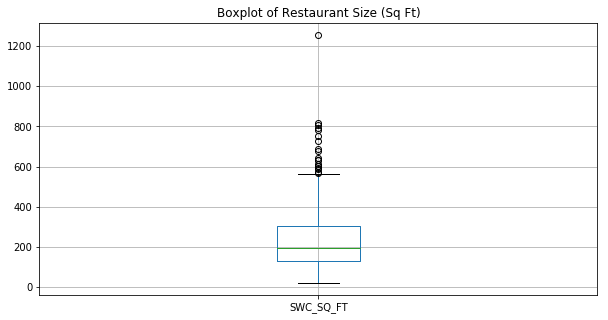

In [4]:
# Boxplot of SWC_SQ_FT to look at outliers visually
plt.figure(figsize=(10,5))
df.boxplot(column=['SWC_SQ_FT'])
plt.title('Boxplot of Restaurant Size (Sq Ft)')

In [14]:
# check the value counts of target variable for the outliers in SWC_SQ_FT
df[df.SWC_SQ_FT >=570].GRADE.value_counts()

1    19
Name: GRADE, dtype: int64

In [5]:
# drop outliers
df = df[df.SWC_SQ_FT<525]

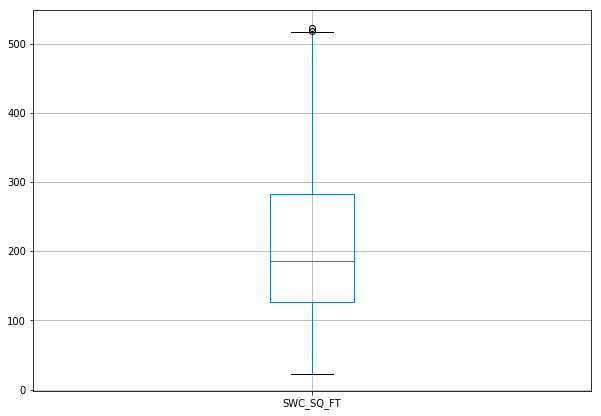

In [6]:
# Boxplot of SWC_SQ_FT to look at outliers visually again after dropping outliers
plt.figure(figsize=(10,7))
df.boxplot(column=['SWC_SQ_FT'])

In [18]:
df.describe()

,CAMIS,ZIPCODE,FLAG__Critical,FLAG__Not Critical,SCORE,GRADE,SWC_SQ_FT,SWC_TABLES,SWC_CHAIRS,COMMUNITY_DISTRICT,...,ZIP_11249,ZIP_11366,ZIP_11368,ZIP_11375,ZIP_11421,ZIP_11432,BRONX,BROOKLYN,MANHATTAN,QUEENS
count,4.070000e+02,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,...,407.000000,407.000000,407.0,407.000000,407.000000,407.0,407.000000,407.000000,407.000000,407.00000
mean,4.588307e+07,10282.203931,9.117936,7.309582,14.329610,0.972973,212.631450,8.727273,19.712531,156.434889,...,0.009828,0.002457,0.0,0.014742,0.002457,0.0,0.014742,0.140049,0.771499,0.07371
std,4.415497e+06,486.749402,5.932365,4.338223,5.595273,0.162362,114.383233,4.996237,11.004630,98.078485,...,0.098769,0.049568,0.0,0.120667,0.049568,0.0,0.120667,0.347465,0.420384,0.26162
min,4.036647e+07,10001.000000,1.000000,0.000000,4.666667,0.000000,23.000000,1.000000,3.000000,101.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000
25%,4.141009e+07,10012.000000,5.000000,4.000000,10.500000,1.000000,126.500000,5.000000,12.000000,103.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.00000
50%,5.000116e+07,10024.000000,8.000000,7.000000,13.375000,1.000000,186.000000,8.000000,17.000000,107.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.00000
75%,5.005042e+07,10075.000000,13.000000,10.000000,17.250000,1.000000,283.000000,11.000000,26.000000,112.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.00000
max,5.008981e+07,11421.000000,34.000000,25.000000,42.000000,1.000000,523.000000,30.000000,64.000000,409.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.00000


Text(0.5, 1.0, 'Boxplot of SWC_TABLES')

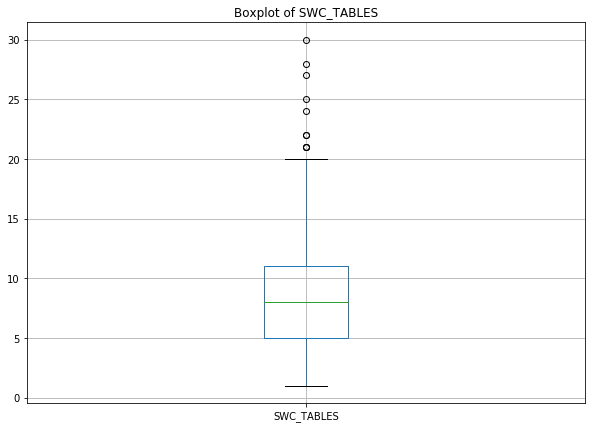

In [9]:
# Boxplot of SWC_TABLES to look at outliers visually again after dropping outliers
plt.figure(figsize=(10,7))
df.boxplot(column=['SWC_TABLES'])
plt.title('Boxplot of SWC_TABLES')

In [20]:
# check value counts of Grade for the restaurants with outlier SWC TABLE counts
df[df['SWC_TABLES']>20].GRADE.value_counts()

1    10
Name: GRADE, dtype: int64

In [10]:
# drop outliers
df = df[df['SWC_TABLES']<=20]

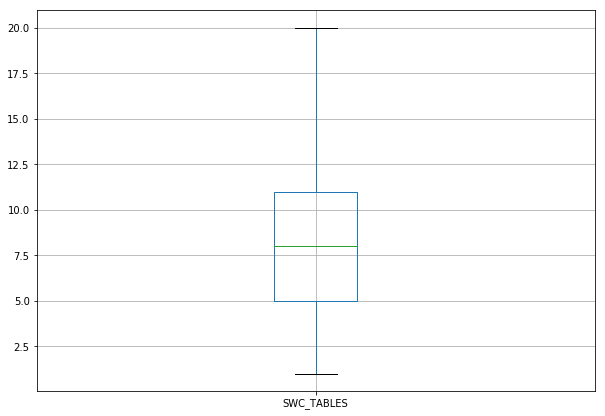

In [11]:
# Boxplot of SWC_SQ_FT to look at outliers visually again after dropping outliers
plt.figure(figsize=(10,7))
df.boxplot(column=['SWC_TABLES'])

In [23]:
df.describe()

,CAMIS,ZIPCODE,FLAG__Critical,FLAG__Not Critical,SCORE,GRADE,SWC_SQ_FT,SWC_TABLES,SWC_CHAIRS,COMMUNITY_DISTRICT,...,ZIP_11249,ZIP_11366,ZIP_11368,ZIP_11375,ZIP_11421,ZIP_11432,BRONX,BROOKLYN,MANHATTAN,QUEENS
count,3.970000e+02,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,...,397.000000,397.000000,397.0,397.000000,397.000000,397.0,397.000000,397.000000,397.000000,397.000000
mean,4.595819e+07,10279.443325,9.133501,7.307305,14.386275,0.972292,206.400504,8.340050,18.952141,155.962217,...,0.010076,0.002519,0.0,0.012594,0.002519,0.0,0.015113,0.138539,0.773300,0.073048
std,4.408222e+06,484.049892,5.947566,4.366571,5.640947,0.164341,108.559988,4.385206,9.959272,97.711832,...,0.099996,0.050189,0.0,0.111657,0.050189,0.0,0.122158,0.345901,0.419225,0.260543
min,4.036647e+07,10001.000000,1.000000,0.000000,4.666667,0.000000,23.000000,1.000000,3.000000,101.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,4.142270e+07,10012.000000,5.000000,4.000000,10.500000,1.000000,126.000000,5.000000,12.000000,103.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,5.000155e+07,10024.000000,8.000000,7.000000,13.469388,1.000000,183.000000,8.000000,16.000000,107.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,5.005214e+07,10075.000000,13.000000,10.000000,17.333333,1.000000,277.000000,11.000000,24.000000,112.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,5.008981e+07,11421.000000,34.000000,25.000000,42.000000,1.000000,518.000000,20.000000,56.000000,409.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Boxplot of SWC_CHAIRS')

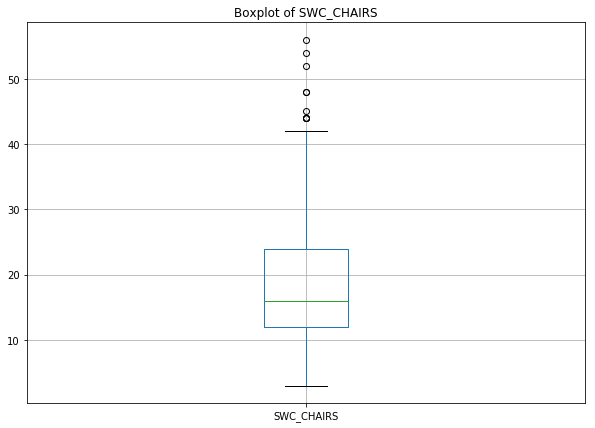

In [12]:
# Boxplot of SWC_CHAIRS to look at outliers visually
plt.figure(figsize=(10,7))
df.boxplot(column=['SWC_CHAIRS'])
plt.title('Boxplot of SWC_CHAIRS')

In [25]:
# check value counts of Grade for the restaurants with outlier SWC CHAIRS counts
df[df['SWC_CHAIRS']>=45].GRADE.value_counts()

1    5
0    1
Name: GRADE, dtype: int64

In [13]:
# drop rows where the # of SWC Chairs are outliers
df = df[df['SWC_CHAIRS']<45]

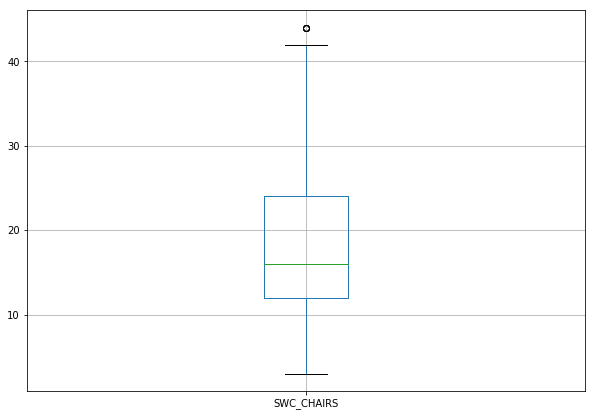

In [14]:
# Boxplot of SWC_CHAIRS to look at outliers visually after dropping outliers in SWC Chairs
plt.figure(figsize=(10,7))
df.boxplot(column=['SWC_CHAIRS'])

In [28]:
df.shape

(391, 123)

Text(0.5, 1.0, 'Boxplot of Scores')

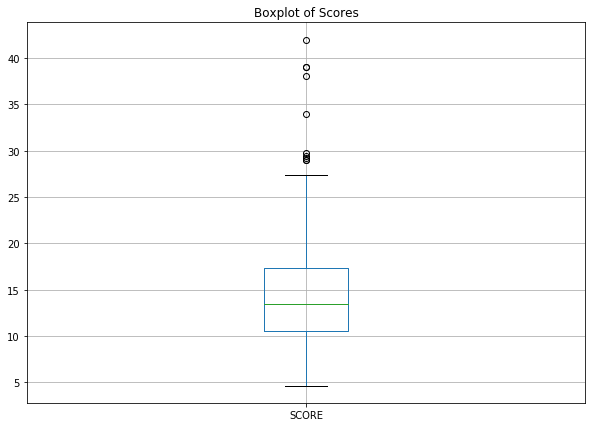

In [15]:
# Boxplot of SCORES to look at outliers visually
plt.figure(figsize=(10,7))
df.boxplot(column=['SCORE'])
plt.title('Boxplot of Scores')

In [30]:
# look at target column value counts for the outliers - keep SCORE as is for now as it will further worsen the class imbalance - may drop SCORE later
df[df.SCORE >= 28].GRADE.value_counts()

1    5
0    5
Name: GRADE, dtype: int64

In [ ]:
# drop outliers
# df = df[df.SCORE < 28]

In [31]:
df.shape

(391, 123)

In [32]:
df.describe()

,CAMIS,ZIPCODE,FLAG__Critical,FLAG__Not Critical,SCORE,GRADE,SWC_SQ_FT,SWC_TABLES,SWC_CHAIRS,COMMUNITY_DISTRICT,...,ZIP_11249,ZIP_11366,ZIP_11368,ZIP_11375,ZIP_11421,ZIP_11432,BRONX,BROOKLYN,MANHATTAN,QUEENS
count,3.910000e+02,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,...,391.000000,391.000000,391.0,391.000000,391.000000,391.0,391.000000,391.000000,391.000000,391.000000
mean,4.598640e+07,10280.342711,9.117647,7.281330,14.399430,0.974425,202.838875,8.179028,18.468031,155.943734,...,0.010230,0.002558,0.0,0.012788,0.002558,0.0,0.015345,0.140665,0.772379,0.071611
std,4.405308e+06,485.206940,5.974001,4.355678,5.646453,0.158067,105.314046,4.218843,9.216394,97.526312,...,0.100755,0.050572,0.0,0.112501,0.050572,0.0,0.123079,0.348121,0.419834,0.258173
min,4.036647e+07,10001.000000,1.000000,0.000000,4.666667,0.000000,23.000000,1.000000,3.000000,101.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,4.142599e+07,10012.000000,5.000000,4.000000,10.500000,1.000000,126.000000,5.000000,12.000000,103.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,5.000160e+07,10024.000000,8.000000,7.000000,13.500000,1.000000,181.000000,7.000000,16.000000,107.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,5.005237e+07,10075.000000,13.000000,10.000000,17.386054,1.000000,271.500000,10.000000,24.000000,110.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,5.008981e+07,11421.000000,34.000000,25.000000,42.000000,1.000000,517.000000,20.000000,44.000000,409.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


#### Correlation

In [33]:
# look at a subset of the data for correlation
df.loc[:, 'CAMIS':'MONTH_12'].corr()[df.loc[:, 'CAMIS':'MONTH_12'].corr() > 0.5]

,CAMIS,ZIPCODE,FLAG__Critical,FLAG__Not Critical,SCORE,GRADE,SWC_SQ_FT,SWC_TABLES,SWC_CHAIRS,COMMUNITY_DISTRICT,...,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
CAMIS,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIPCODE,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.967542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG__Critical,NaN,NaN,1.000000,0.746548,0.596141,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FLAG__Not Critical,NaN,NaN,0.746548,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SCORE,NaN,NaN,0.596141,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRADE,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SWC_SQ_FT,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.748653,0.841112,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SWC_TABLES,NaN,NaN,NaN,NaN,NaN,NaN,0.748653,1.000000,0.896800,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SWC_CHAIRS,NaN,NaN,NaN,NaN,NaN,NaN,0.841112,0.896800,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COMMUNITY_DISTRICT,NaN,0.967542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# create a new dataframe with dropped highly correlated features
data = df.drop(['FLAG__Not Critical', 'SWC_TABLES', 'ZIPCODE', 'CITY_COUNCIL_DISTRICT'], axis=1).copy()

In [35]:
data.loc[:, 'FLAG__Critical':'MONTH_12'].corr()[data.loc[:, 'FLAG__Critical':'MONTH_12'].corr() > 0.5]

,FLAG__Critical,SCORE,GRADE,SWC_SQ_FT,SWC_CHAIRS,COMMUNITY_DISTRICT,YEAR_2011,YEAR_2012,YEAR_2013,YEAR_2014,...,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12
FLAG__Critical,1.000000,0.596141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SCORE,0.596141,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GRADE,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SWC_SQ_FT,NaN,NaN,NaN,1.000000,0.841112,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SWC_CHAIRS,NaN,NaN,NaN,0.841112,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COMMUNITY_DISTRICT,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEAR_2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEAR_2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEAR_2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEAR_2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Visualizations

In [17]:
# create table for heatmap visualization (next step)
tc = df.pivot_table(index='SWC_TABLES', columns='SWC_CHAIRS',values='SCORE') 

Text(0.5, 1.0, 'Scores Based On Tables and Chairs')

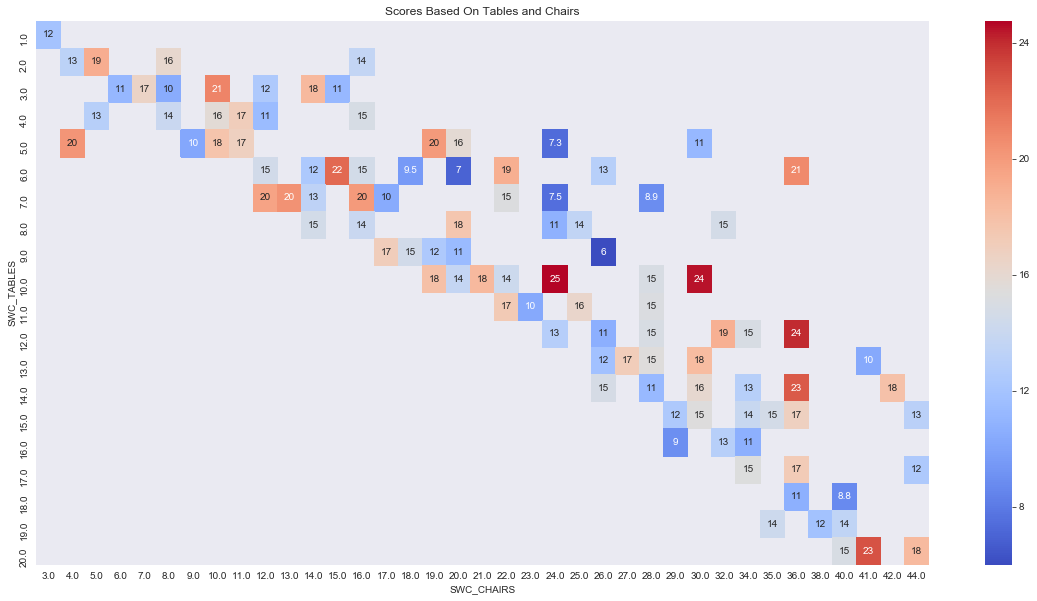

In [18]:
# visualizing the relationship between # of tables and chairs and grade received
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
# cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
sns.heatmap(tc, annot=True, cmap='coolwarm')
plt.title('Scores Based On Tables and Chairs')

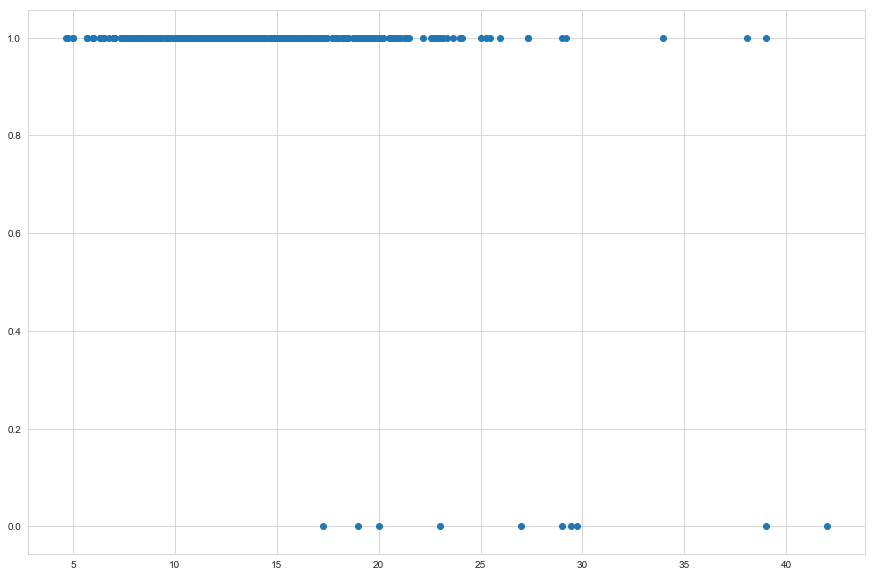

In [38]:
# plot SCORE vs. GRADE
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
plt.scatter(x=data.SCORE, y=data.GRADE)

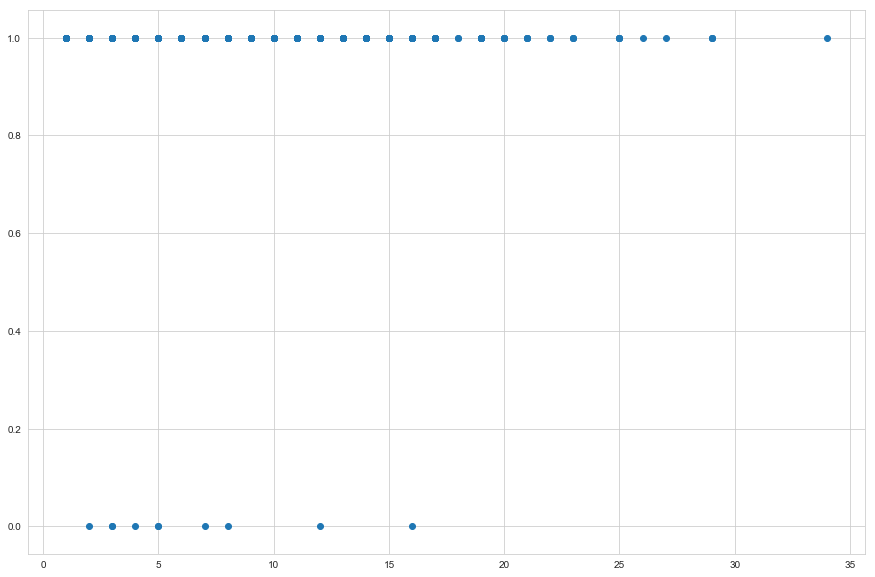

In [39]:
# plot Count of Critical Flags vs. Grade
sns.set_style('whitegrid')
plt.figure(figsize=(15,10))
plt.scatter(x=data.FLAG__Critical, y=data.GRADE)

In [40]:
# subset the data without dummy variables
raw = data.loc[:, 'DBA':'COMMUNITY_DISTRICT'].copy()

In [41]:
raw.head()

,DBA,BORO,FLAG__Critical,SCORE,GRADE,LIC_STATUS,SWC_SQ_FT,SWC_CHAIRS,COMMUNITY_DISTRICT
1,TIO PEPE,MANHATTAN,2,9.333333,1,Active,129.0,16.0,102.0
2,OLIVE TREE CAFE & COMEDY CELLAR,MANHATTAN,1,5.666667,1,Active,46.0,6.0,102.0
3,LA RIPAILLE RESTAURANT,MANHATTAN,8,13.600000,1,Active,129.0,11.0,102.0
4,THE MALT HOUSE,MANHATTAN,8,18.000000,1,Active,193.0,18.0,102.0
5,MOLLY WEE PUB,MANHATTAN,6,11.000000,1,Active,196.0,14.0,105.0


Text(0.5, 1.0, 'Locations of Restaurant Inspections')

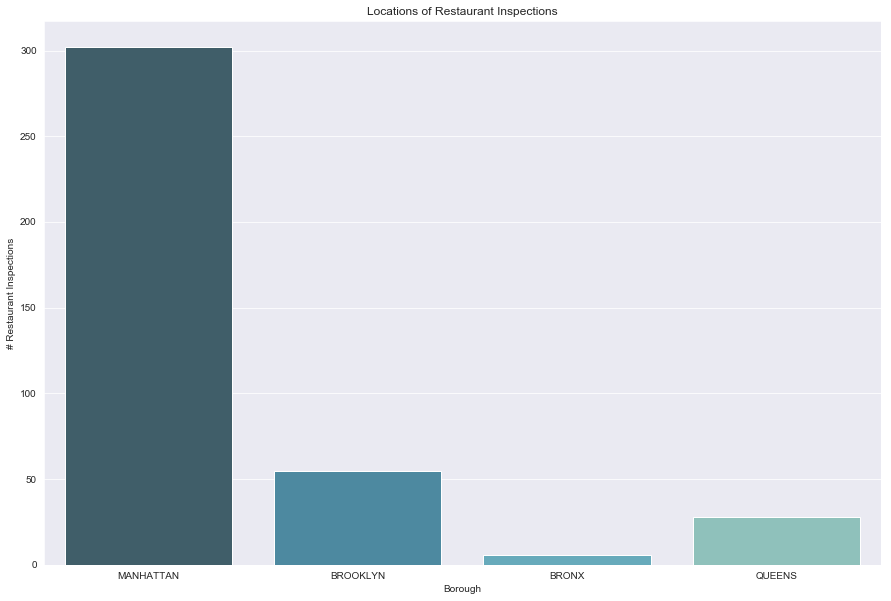

In [42]:
# visualize how many restaurant inspections are in each borough in the dataset
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
boro = sns.countplot(x = 'BORO', data = raw, palette = 'GnBu_d')
boro.set_xlabel('Borough')
boro.set_ylabel('# Restaurant Inspections')
boro.set_title('Locations of Restaurant Inspections')

Text(0.5, 1.0, 'Number of Critical Violations Per Borough')

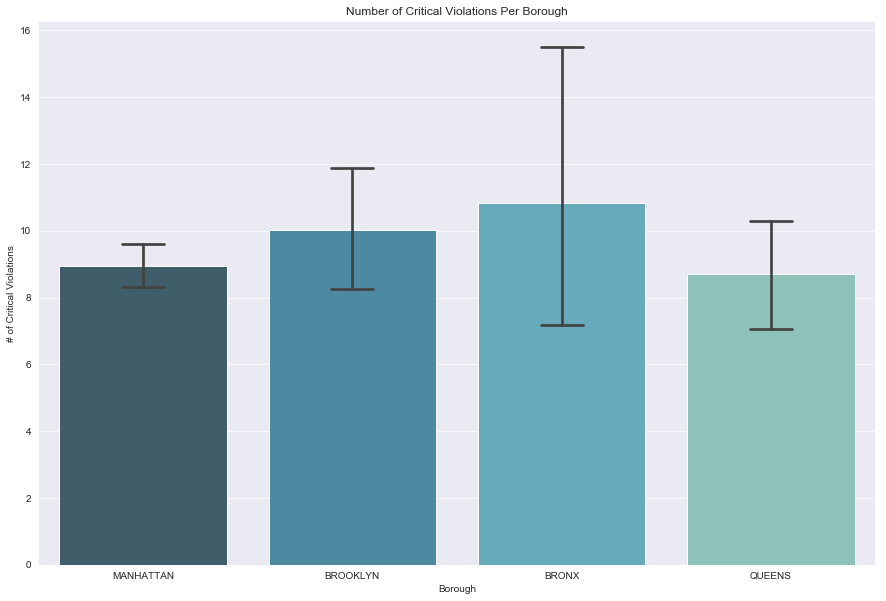

In [43]:
# visualize how many critical flags are in each borough in the dataset
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
flags = sns.barplot(x='BORO', y = 'FLAG__Critical', data = raw, palette = 'GnBu_d', capsize=0.2)
flags.set_xlabel('Borough')
flags.set_ylabel('# of Critical Violations')
flags.set_title('Number of Critical Violations Per Borough')

Text(0.5, 1.0, 'Size of Restaurants Per Borough')

<Figure size 1080x720 with 0 Axes>

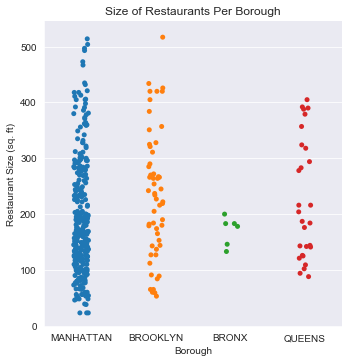

In [44]:
# visualize the sizes of restaurants in each borough in the dataset
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.catplot(x='BORO', y = 'SWC_SQ_FT', data = raw)
plt.xlabel('Borough')
plt.ylabel('Restaurant Size (sq. ft)')
plt.title('Size of Restaurants Per Borough')

In [45]:
data.head()

,CAMIS,DBA,BORO,FLAG__Critical,SCORE,GRADE,LIC_STATUS,SWC_SQ_FT,SWC_CHAIRS,COMMUNITY_DISTRICT,...,ZIP_11249,ZIP_11366,ZIP_11368,ZIP_11375,ZIP_11421,ZIP_11432,BRONX,BROOKLYN,MANHATTAN,QUEENS
1,40366473,TIO PEPE,MANHATTAN,2,9.333333,1,Active,129.0,16.0,102.0,...,0,0,0,0,0,0,0,0,1,0
2,40370856,OLIVE TREE CAFE & COMEDY CELLAR,MANHATTAN,1,5.666667,1,Active,46.0,6.0,102.0,...,0,0,0,0,0,0,0,0,1,0
3,40372262,LA RIPAILLE RESTAURANT,MANHATTAN,8,13.600000,1,Active,129.0,11.0,102.0,...,0,0,0,0,0,0,0,0,1,0
4,40373912,THE MALT HOUSE,MANHATTAN,8,18.000000,1,Active,193.0,18.0,102.0,...,0,0,0,0,0,0,0,0,1,0
5,40374277,MOLLY WEE PUB,MANHATTAN,6,11.000000,1,Active,196.0,14.0,105.0,...,0,0,0,0,0,0,0,0,1,0


Text(0.5, 1.0, 'Restaurant Inspection Scores By Restaurant Size and Borough')

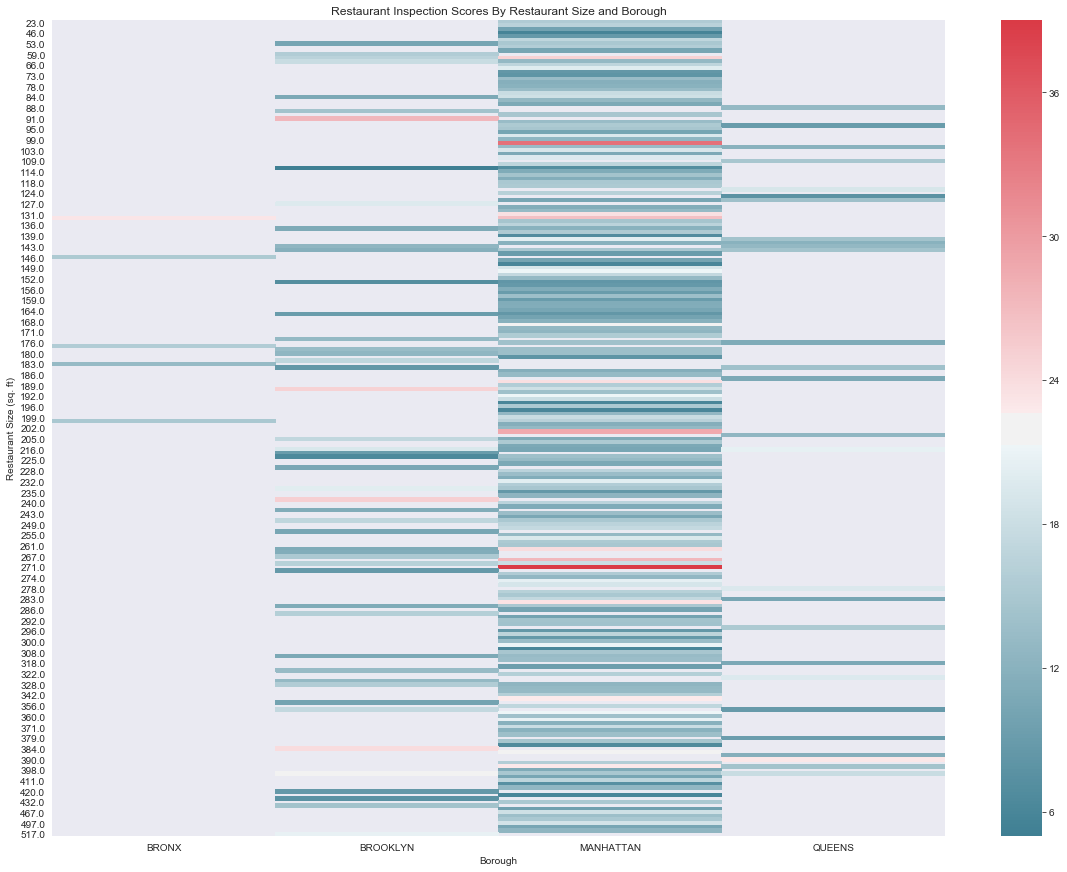

In [46]:
# create table for heatmap visualization (next step)
sb = data.pivot_table(index='SWC_SQ_FT', columns='BORO', values='SCORE') 

# visualizing the # of critical violations of each district and borough
plt.figure(figsize=(20,15))
sns.set_style("darkgrid")
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sb_heat = sns.heatmap(sb, cmap=cmap)
sb_heat.set_xlabel('Borough')
sb_heat.set_ylabel('Restaurant Size (sq. ft)')
sb_heat.set_title('Restaurant Inspection Scores By Restaurant Size and Borough')

In [47]:
# create subset of just borough and grade 
grade_boro = raw.loc[:, ['BORO', 'GRADE']].groupby('BORO').agg({'GRADE': 'sum'}).reset_index().copy()

Text(0.5, 1.0, 'Number of Restaurants With An A Per Borough')

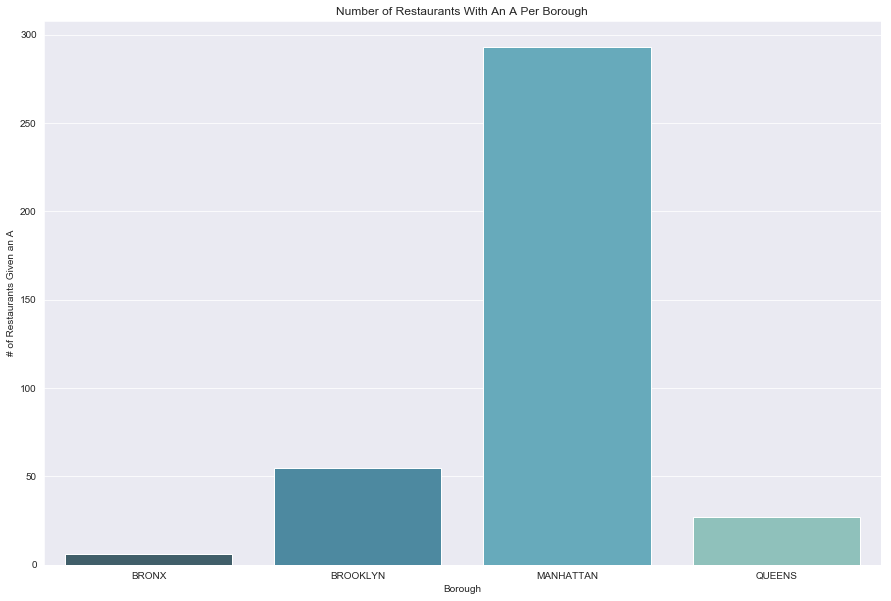

In [48]:
# visualize the count of restaurants that received A's in each borough in the dataset
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.barplot(x='BORO', y = 'GRADE', data = grade_boro, palette='GnBu_d')
plt.xlabel('Borough')
plt.ylabel('# of Restaurants Given an A')
plt.title('Number of Restaurants With An A Per Borough')

In [49]:
# create subset of just community district and borough 
boro_district = raw.loc[:, ['BORO', 'COMMUNITY_DISTRICT']].copy()

In [50]:
# create table for heatmap visualization (next step)
bd = raw.pivot_table(index='BORO', columns='COMMUNITY_DISTRICT',values='FLAG__Critical') 

Text(0.5, 1.0, 'Number of Critical Violations By Borough and Community District')

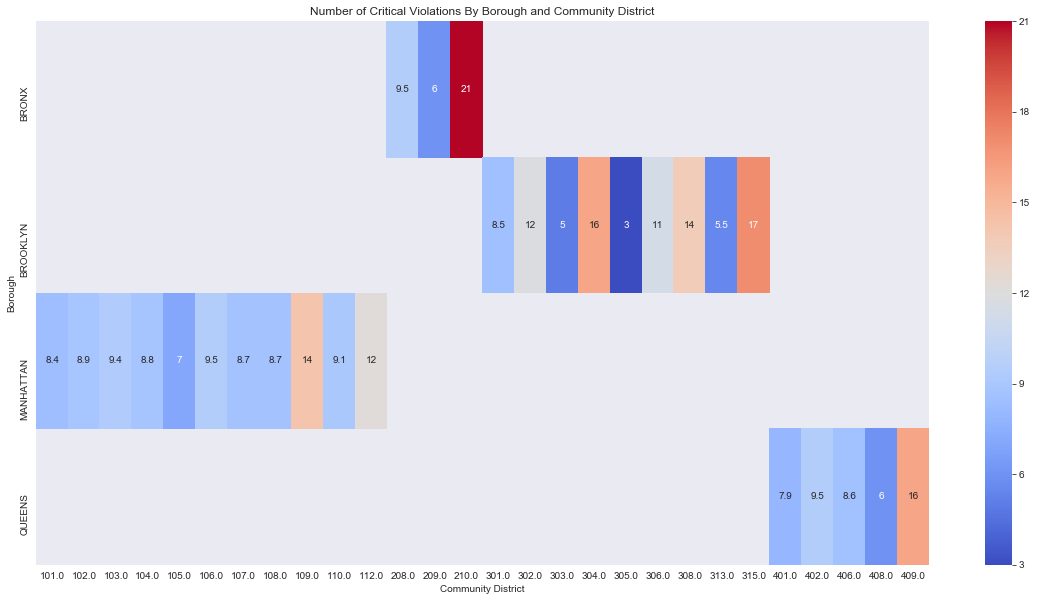

In [51]:
# visualizing the # of critical violations of each district and borough
plt.figure(figsize=(20,10))
sns.set_style("darkgrid")
# cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
db = sns.heatmap(bd, annot=True, cmap='coolwarm')
db.set_xlabel('Community District')
db.set_ylabel('Borough')
db.set_title('Number of Critical Violations By Borough and Community District')

Text(0.5, 1.0, 'Community Districts in Each Borough')

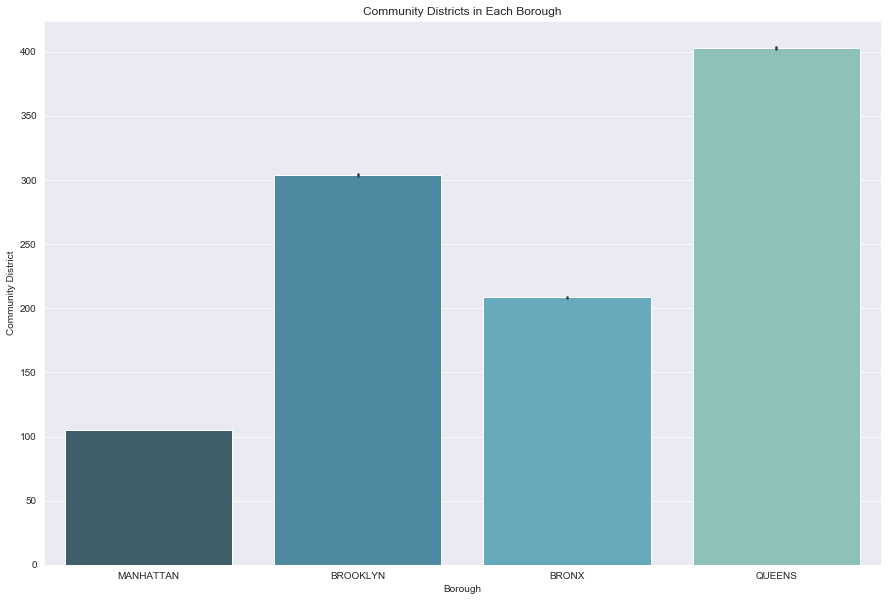

In [52]:
# visualize the community district and borough
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.barplot(x='BORO', y='COMMUNITY_DISTRICT', data = boro_district, palette='GnBu_d')
plt.xlabel('Borough')
plt.ylabel('Community District')
plt.title('Community Districts in Each Borough')

In [53]:
# create subset of just community district and grade 
grade_district = raw.loc[:, ['COMMUNITY_DISTRICT', 'GRADE']].groupby('COMMUNITY_DISTRICT').agg({'GRADE': 'sum'}).reset_index().copy()

Text(0.5, 1.0, 'Number of Restaurants With An A Per Community District')

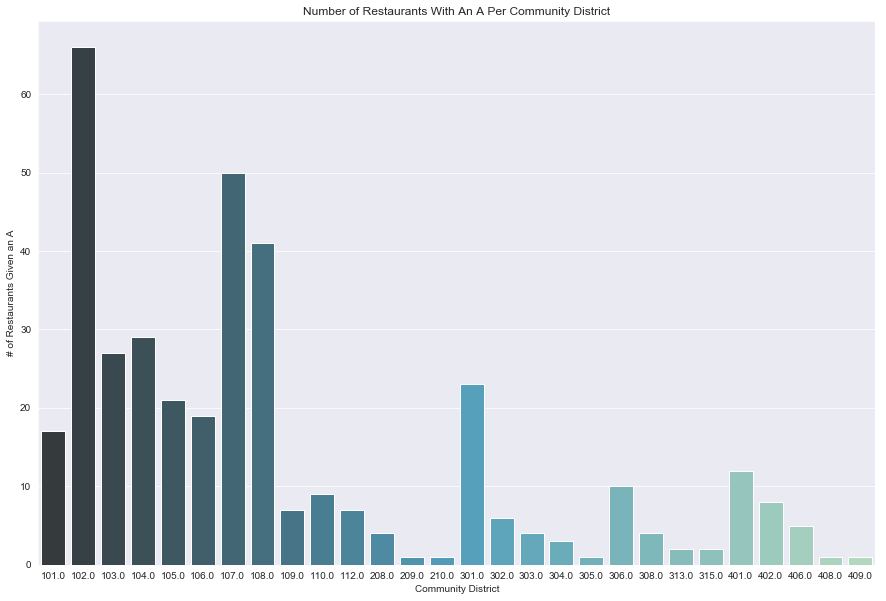

In [54]:
# visualize the count of restaurants that received A's in each community district in the dataset
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.barplot(x='COMMUNITY_DISTRICT', y = 'GRADE', data = grade_district, palette='GnBu_d')
plt.xlabel('Community District')
plt.ylabel('# of Restaurants Given an A')
plt.title('Number of Restaurants With An A Per Community District')

Text(0.5, 1.0, 'Number of Restaurant Inspections Per Community District')

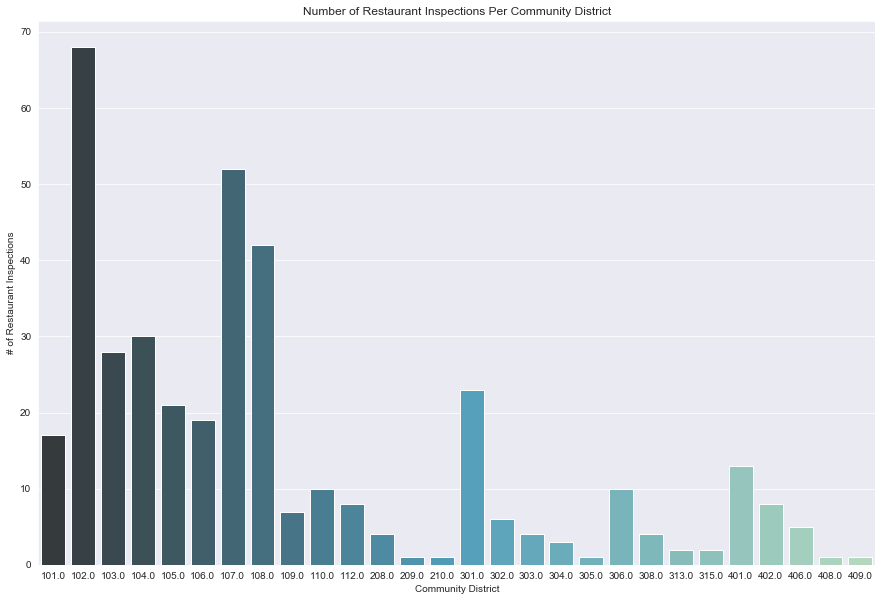

In [55]:
# visualize the count of restaurants that received A's in each community district in the dataset
sns.set_style('darkgrid')
plt.figure(figsize=(15,10))
sns.countplot(x='COMMUNITY_DISTRICT', data = raw, palette='GnBu_d')
plt.xlabel('Community District')
plt.ylabel('# of Restaurant Inspections')
plt.title('Number of Restaurant Inspections Per Community District')

# Feature Engineering & Selection

In [56]:
df.head()

,CAMIS,DBA,BORO,ZIPCODE,FLAG__Critical,FLAG__Not Critical,SCORE,GRADE,LIC_STATUS,SWC_SQ_FT,...,ZIP_11249,ZIP_11366,ZIP_11368,ZIP_11375,ZIP_11421,ZIP_11432,BRONX,BROOKLYN,MANHATTAN,QUEENS
1,40366473,TIO PEPE,MANHATTAN,10014,2,5,9.333333,1,Active,129.0,...,0,0,0,0,0,0,0,0,1,0
2,40370856,OLIVE TREE CAFE & COMEDY CELLAR,MANHATTAN,10012,1,4,5.666667,1,Active,46.0,...,0,0,0,0,0,0,0,0,1,0
3,40372262,LA RIPAILLE RESTAURANT,MANHATTAN,10014,8,5,13.600000,1,Active,129.0,...,0,0,0,0,0,0,0,0,1,0
4,40373912,THE MALT HOUSE,MANHATTAN,10012,8,10,18.000000,1,Active,193.0,...,0,0,0,0,0,0,0,0,1,0
5,40374277,MOLLY WEE PUB,MANHATTAN,10001,6,6,11.000000,1,Active,196.0,...,0,0,0,0,0,0,0,0,1,0


In [57]:
# drop unnecessary columns
df = df.drop(['CAMIS', 'DBA', 'BORO', 'ZIPCODE', 'LIC_STATUS', 'CITY_COUNCIL_DISTRICT'], axis=1)

In [58]:
df.columns

Index(['FLAG__Critical', 'FLAG__Not Critical', 'SCORE', 'GRADE', 'SWC_SQ_FT',
       'SWC_TABLES', 'SWC_CHAIRS', 'COMMUNITY_DISTRICT', 'ISSUANCE_DD',
       'YEAR_2011',
       ...
       'ZIP_11249', 'ZIP_11366', 'ZIP_11368', 'ZIP_11375', 'ZIP_11421',
       'ZIP_11432', 'BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS'],
      dtype='object', length=117)

In [59]:
# convert Issuance Date to datetime object
df.ISSUANCE_DD = pd.to_datetime(df.ISSUANCE_DD)

In [66]:
# create function to calculate duration since business was open
def calc_duration(x):
    return datetime.today() - x

In [67]:
# create new column with duration open in days from today(5/9/19)
df['DURATION_OPEN'] = df.ISSUANCE_DD.apply(lambda x: calc_duration(x))

In [68]:
# split out the days duration
df['DAYS_OPEN'] = df.DURATION_OPEN.dt.days

In [69]:
# create dummy variables 
district_dummies = pd.get_dummies(df['COMMUNITY_DISTRICT'], prefix='DIST_')

In [70]:
# concat dummy df to main df
dist_df = pd.concat([df, district_dummies], axis=1)

In [71]:
# create dummy variables 
size_dummies = pd.get_dummies(df['SWC_SQ_FT'], prefix='SQFT_')

In [72]:
# concat dummy df to main df
size_df = pd.concat([dist_df, size_dummies], axis=1)

In [73]:
# create new df and drop Tables and Chairs because they are highly correlated with SQ FT, community district because there are dummy variables, and issuance dd because new feature has been created
df_dummy = size_df.drop(['SWC_SQ_FT', 'SWC_TABLES', 'SWC_CHAIRS', 'COMMUNITY_DISTRICT', 'ISSUANCE_DD'], axis=1).copy()

In [74]:
df_dummy.head()

,FLAG__Critical,FLAG__Not Critical,SCORE,GRADE,YEAR_2011,YEAR_2012,YEAR_2013,YEAR_2014,YEAR_2015,YEAR_2016,...,SQFT__432.0,SQFT__434.0,SQFT__435.0,SQFT__467.0,SQFT__473.0,SQFT__493.0,SQFT__497.0,SQFT__504.0,SQFT__514.0,SQFT__517.0
1,2,5,9.333333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,4,5.666667,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,8,5,13.600000,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,8,10,18.000000,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,6,6,11.000000,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [75]:
df_dummy.shape

(391, 371)

In [76]:
# change dtype of Days Open to integer from datetime object
df_dummy.DAYS_OPEN = df_dummy.DAYS_OPEN.astype(int)

In [77]:
df_dummy.describe()

,FLAG__Critical,FLAG__Not Critical,SCORE,GRADE,YEAR_2011,YEAR_2012,YEAR_2013,YEAR_2014,YEAR_2015,YEAR_2016,...,SQFT__432.0,SQFT__434.0,SQFT__435.0,SQFT__467.0,SQFT__473.0,SQFT__493.0,SQFT__497.0,SQFT__504.0,SQFT__514.0,SQFT__517.0
count,391.000000,391.000000,391.000000,391.000000,391.0,391.0,391.0,391.0,391.000000,391.000000,...,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,9.117647,7.281330,14.399430,0.974425,0.0,0.0,0.0,0.0,0.097187,0.687980,...,0.002558,0.002558,0.002558,0.002558,0.002558,0.002558,0.002558,0.002558,0.002558,0.002558
std,5.974001,4.355678,5.646453,0.158067,0.0,0.0,0.0,0.0,0.296591,0.463912,...,0.050572,0.050572,0.050572,0.050572,0.050572,0.050572,0.050572,0.050572,0.050572,0.050572
min,1.000000,0.000000,4.666667,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,4.000000,10.500000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,7.000000,13.500000,1.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.000000,10.000000,17.386054,1.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,34.000000,25.000000,42.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
# drop Year 2011-2014 columns since there are only 0s as values
df_dummy = df_dummy.drop(['YEAR_2011', 'YEAR_2012', 'YEAR_2013', 'YEAR_2014'], axis=1)

In [79]:
df_dummy.shape

(391, 367)

In [80]:
df_dummy.describe()

,FLAG__Critical,FLAG__Not Critical,SCORE,GRADE,YEAR_2015,YEAR_2016,YEAR_2017,YEAR_2018,YEAR_2019,MONTH_1,...,SQFT__432.0,SQFT__434.0,SQFT__435.0,SQFT__467.0,SQFT__473.0,SQFT__493.0,SQFT__497.0,SQFT__504.0,SQFT__514.0,SQFT__517.0
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,...,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,9.117647,7.281330,14.399430,0.974425,0.097187,0.687980,0.823529,0.951407,0.529412,0.381074,...,0.002558,0.002558,0.002558,0.002558,0.002558,0.002558,0.002558,0.002558,0.002558,0.002558
std,5.974001,4.355678,5.646453,0.158067,0.296591,0.463912,0.381708,0.215292,0.499774,0.486273,...,0.050572,0.050572,0.050572,0.050572,0.050572,0.050572,0.050572,0.050572,0.050572,0.050572
min,1.000000,0.000000,4.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,4.000000,10.500000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,7.000000,13.500000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,13.000000,10.000000,17.386054,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,34.000000,25.000000,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
# drop zip code dummy variables since zip code has high correlation with the boroughs and districts
df_dummy = df_dummy.drop(['ZIP_10001', 'ZIP_10002', 'ZIP_10003', 'ZIP_10006', 'ZIP_10007',
       'ZIP_10009', 'ZIP_10010', 'ZIP_10011', 'ZIP_10012', 'ZIP_10013',
       'ZIP_10014', 'ZIP_10016', 'ZIP_10017', 'ZIP_10019', 'ZIP_10021',
       'ZIP_10022', 'ZIP_10023', 'ZIP_10024', 'ZIP_10025', 'ZIP_10026',
       'ZIP_10027', 'ZIP_10028', 'ZIP_10031', 'ZIP_10032', 'ZIP_10034',
       'ZIP_10036', 'ZIP_10038', 'ZIP_10040', 'ZIP_10065', 'ZIP_10075',
       'ZIP_10128', 'ZIP_10282', 'ZIP_10461', 'ZIP_10462', 'ZIP_10463',
       'ZIP_10471', 'ZIP_11101', 'ZIP_11102', 'ZIP_11103', 'ZIP_11104',
       'ZIP_11105', 'ZIP_11106', 'ZIP_11109', 'ZIP_11201', 'ZIP_11205',
       'ZIP_11206', 'ZIP_11208', 'ZIP_11209', 'ZIP_11211', 'ZIP_11213',
       'ZIP_11215', 'ZIP_11216', 'ZIP_11217', 'ZIP_11218', 'ZIP_11221',
       'ZIP_11222', 'ZIP_11224', 'ZIP_11229', 'ZIP_11231', 'ZIP_11235',
       'ZIP_11237', 'ZIP_11238', 'ZIP_11249', 'ZIP_11366', 'ZIP_11368',
       'ZIP_11375', 'ZIP_11421', 'ZIP_11432'], axis=1)

### Decision Tree for Feature Selection

In [82]:
# Training a Decision Tree Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [83]:
# identify X and y
X = df_dummy.drop(['GRADE', 'CUISINES', 'DURATION_OPEN', 'FLAG__Critical'], axis=1).copy()
y = df_dummy.GRADE.copy()

In [84]:
# create training and testing datasets with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [85]:
# Create an instance of DecisionTreeClassifier() called dtree
dtree = DecisionTreeClassifier()
dtree_select = dtree.fit(X_train, y_train)

In [86]:
# Calculate feature importances
importances = dtree_select.feature_importances_

In [87]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# print length of list
print('Length of Names List: ', len(names))

#list names
print(names[:200])

Length of Names List:  295
['SCORE', 'YEAR_2018', 'SQFT__390.0', 'SQFT__277.0', 'MONTH_9', 'MONTH_2', 'DIST__112.0', 'DAYS_OPEN', 'SQFT__144.0', 'SQFT__73.0', 'SQFT__102.0', 'SQFT__95.0', 'SQFT__96.0', 'SQFT__98.0', 'SQFT__99.0', 'SQFT__101.0', 'SQFT__65.0', 'SQFT__92.0', 'SQFT__103.0', 'SQFT__105.0', 'SQFT__106.0', 'SQFT__109.0', 'SQFT__110.0', 'SQFT__112.0', 'SQFT__94.0', 'SQFT__91.0', 'SQFT__72.0', 'SQFT__90.0', 'SQFT__89.0', 'SQFT__88.0', 'SQFT__116.0', 'SQFT__87.0', 'SQFT__85.0', 'SQFT__84.0', 'SQFT__66.0', 'SQFT__81.0', 'SQFT__80.0', 'SQFT__78.0', 'SQFT__77.0', 'SQFT__68.0', 'SQFT__76.0', 'SQFT__114.0', 'SQFT__517.0', 'SQFT__117.0', 'SQFT__150.0', 'SQFT__143.0', 'SQFT__145.0', 'SQFT__146.0', 'SQFT__147.0', 'SQFT__148.0', 'SQFT__149.0', 'SQFT__151.0', 'SQFT__141.0', 'SQFT__152.0', 'SQFT__153.0', 'SQFT__155.0', 'SQFT__156.0', 'SQFT__157.0', 'SQFT__158.0', 'SQFT__142.0', 'SQFT__139.0', 'SQFT__118.0', 'SQFT__127.0', 'SQFT__59.0', 'SQFT__120.0', 'SQFT__121.0', 'SQFT__124.0', 'SQFT__12

In [88]:
# create subset of features listed from feature importance selection by Decision Tree
feat_imp = X[names[:50]].copy()

In [89]:
feat_imp.head()

,SCORE,YEAR_2018,SQFT__390.0,SQFT__277.0,MONTH_9,MONTH_2,DIST__112.0,DAYS_OPEN,SQFT__144.0,SQFT__73.0,...,SQFT__76.0,SQFT__114.0,SQFT__517.0,SQFT__117.0,SQFT__150.0,SQFT__143.0,SQFT__145.0,SQFT__146.0,SQFT__147.0,SQFT__148.0
1,9.333333,1,0,0,0,0,0,293,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5.666667,1,0,0,0,0,0,146,0,0,...,0,0,0,0,0,0,0,0,0,0
3,13.600000,1,0,0,1,0,0,97,0,0,...,0,0,0,0,0,0,0,0,0,0
4,18.000000,1,0,0,0,1,0,206,0,0,...,0,0,0,0,0,0,0,0,0,0
5,11.000000,1,0,0,0,0,0,172,0,0,...,0,0,0,0,0,0,0,0,0,0


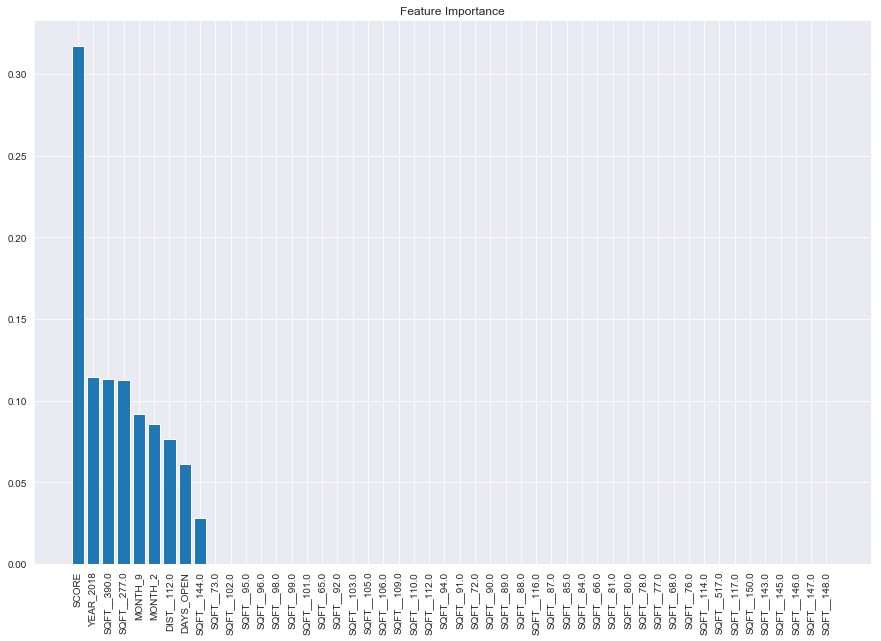

In [90]:
# Create plot
plt.figure(figsize=(15,10))

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(feat_imp.shape[1]), importances[indices[:50]])

# Add feature names as x-axis labels
plt.xticks(range(feat_imp.shape[1]), names[:50], rotation=90)

# Show plot
plt.show()

# Model

### Import Libraries

In [91]:
# import libraries
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, accuracy_score
import pickle

In [92]:
# define function to pick model after it is fit
def pickle_model(model_name, model):
    model_pickle_path = 'EDA2_{}.pkl'.format(model_name)
    model_pickle = open(model_pickle_path, 'wb')
    pickle.dump(model, model_pickle)
    model_pickle.close()

### Train Test Split

In [109]:
# identify X and y
X = df_dummy[['SCORE', 'YEAR_2018', 'SQFT__390.0', 'SQFT__277.0', 'MONTH_9', 'MONTH_2', 'DIST__112.0', 'DAYS_OPEN', 'SQFT__144.0', 'SQFT__73.0', 'SQFT__102.0', 'SQFT__95.0', 'SQFT__96.0', 'SQFT__98.0', 'SQFT__99.0', 'SQFT__101.0', 'SQFT__65.0', 'SQFT__92.0', 'SQFT__103.0', 'SQFT__105.0', 'SQFT__106.0', 'SQFT__109.0', 'SQFT__110.0', 'SQFT__112.0', 'SQFT__94.0', 'SQFT__91.0', 'SQFT__72.0', 'SQFT__90.0', 'SQFT__89.0', 'SQFT__88.0', 'SQFT__116.0', 'SQFT__87.0', 'SQFT__85.0', 'SQFT__84.0', 'SQFT__66.0', 'SQFT__81.0', 'SQFT__80.0', 'SQFT__78.0', 'SQFT__77.0', 'SQFT__68.0', 'SQFT__76.0', 'SQFT__114.0', 'SQFT__517.0', 'SQFT__117.0', 'SQFT__150.0', 'SQFT__143.0', 'SQFT__145.0', 'SQFT__146.0', 'SQFT__147.0', 'SQFT__148.0', 'SQFT__149.0', 'SQFT__151.0', 'SQFT__141.0', 'SQFT__152.0', 'SQFT__153.0', 'SQFT__155.0', 'SQFT__156.0', 'SQFT__157.0', 'SQFT__158.0', 'SQFT__142.0', 'SQFT__139.0', 'SQFT__118.0', 'SQFT__127.0', 'SQFT__59.0', 'SQFT__120.0', 'SQFT__121.0', 'SQFT__124.0', 'SQFT__125.0', 'SQFT__126.0', 'SQFT__129.0', 'SQFT__138.0', 'SQFT__130.0', 'SQFT__131.0', 'SQFT__133.0', 'SQFT__134.0', 'SQFT__136.0', 'SQFT__137.0', 'SQFT__60.0', 'SQFT__52.0', 'SQFT__56.0', 'European', 'Asian', 'Australian', 'Bakeries', 'Beverages', 'Cold Desserts', 'Delis', 'Healthy', 'DIST__101.0', 'Kosher', 'Latin', 'Middle_Eastern', 'BRONX', 'BROOKLYN', 'MANHATTAN', 'Asia Pacific', 'American', 'African', 'MONTH_12', 'MONTH_11', 'MONTH_10', 'MONTH_8', 'MONTH_7', 'MONTH_6', 'MONTH_5', 'MONTH_4', 'MONTH_3', 'MONTH_1', 'YEAR_2019', 'YEAR_2017', 'YEAR_2016', 'YEAR_2015', 'QUEENS', 'DIST__102.0', 'SQFT__54.0', 'DIST__409.0', 'DIST__313.0', 'DIST__315.0', 'DIST__401.0', 'DIST__402.0', 'DIST__406.0', 'DIST__408.0', 'SQFT__23.0', 'DIST__103.0', 'SQFT__38.0', 'SQFT__39.0', 'SQFT__46.0', 'SQFT__48.0', 'SQFT__162.0', 'SQFT__53.0', 'DIST__308.0', 'DIST__306.0', 'DIST__305.0', 'DIST__304.0', 'DIST__303.0', 'DIST__302.0', 'DIST__301.0', 'DIST__210.0', 'DIST__209.0', 'DIST__208.0', 'DIST__110.0', 'DIST__109.0', 'DIST__108.0', 'DIST__107.0', 'DIST__106.0', 'DIST__105.0', 'DIST__104.0', 'SQFT__159.0', 'SQFT__164.0', 'SQFT__163.0', 'SQFT__349.0', 'SQFT__300.0', 'SQFT__301.0', 'SQFT__302.0', 'SQFT__308.0', 'SQFT__311.0', 'SQFT__312.0', 'SQFT__318.0', 'SQFT__319.0', 'SQFT__321.0', 'SQFT__322.0', 'SQFT__324.0', 'SQFT__325.0', 'SQFT__328.0', 'SQFT__332.0', 'SQFT__335.0', 'SQFT__299.0', 'SQFT__297.0', 'SQFT__296.0', 'SQFT__283.0', 'SQFT__273.0', 'SQFT__274.0', 'SQFT__275.0', 'SQFT__278.0', 'SQFT__279.0', 'SQFT__280.0', 'SQFT__284.0', 'SQFT__294.0', 'SQFT__285.0', 'SQFT__286.0', 'SQFT__290.0', 'SQFT__291.0', 'SQFT__292.0', 'SQFT__293.0', 'SQFT__342.0', 'SQFT__351.0', 'SQFT__514.0', 'SQFT__356.0', 'SQFT__406.0', 'SQFT__411.0', 'SQFT__413.0', 'SQFT__418.0', 'SQFT__420.0', 'SQFT__421.0', 'SQFT__426.0', 'SQFT__432.0', 'SQFT__434.0', 'SQFT__435.0', 'SQFT__467.0', 'SQFT__473.0']]
y = df_dummy.GRADE

In [110]:
# create training and testing datasets with 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [111]:
X_train.head()

,SCORE,YEAR_2018,SQFT__390.0,SQFT__277.0,MONTH_9,MONTH_2,DIST__112.0,DAYS_OPEN,SQFT__144.0,SQFT__73.0,...,SQFT__413.0,SQFT__418.0,SQFT__420.0,SQFT__421.0,SQFT__426.0,SQFT__432.0,SQFT__434.0,SQFT__435.0,SQFT__467.0,SQFT__473.0
432,17.714286,0,0,0,0,1,0,642,0,0,...,0,0,0,0,0,0,0,0,0,0
85,16.914286,1,0,0,0,0,0,495,0,0,...,0,0,0,0,0,0,0,0,0,0
23,10.200000,1,0,0,0,1,0,501,0,0,...,0,0,0,0,0,0,0,0,0,0
6,10.000000,1,0,0,0,0,0,605,0,0,...,0,0,0,0,0,0,0,0,0,0
193,14.400000,1,0,0,0,0,0,368,1,0,...,0,0,0,0,0,0,0,0,0,0


### Scaling the Data

In [112]:
# instantiate the scaler and fit to train data
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [113]:
#Use the .transform() method to transform the features to a scaled version.
scaled_features = scaler.transform(X_train)
data_feat = pd.DataFrame(scaled_features,columns=X.columns)
data_feat.head()

,SCORE,YEAR_2018,SQFT__390.0,SQFT__277.0,MONTH_9,MONTH_2,DIST__112.0,DAYS_OPEN,SQFT__144.0,SQFT__73.0,...,SQFT__413.0,SQFT__418.0,SQFT__420.0,SQFT__421.0,SQFT__426.0,SQFT__432.0,SQFT__434.0,SQFT__435.0,SQFT__467.0,SQFT__473.0
0,0.560414,-4.165686,-0.056705,-0.056705,-0.641689,1.247949,-0.151495,0.848111,-0.113961,0.0,...,0.0,-0.056705,-0.098533,-0.056705,0.0,0.0,0.0,-0.056705,-0.056705,-0.056705
1,0.423030,0.240056,-0.056705,-0.056705,-0.641689,-0.801315,-0.151495,0.193696,-0.113961,0.0,...,0.0,-0.056705,-0.098533,-0.056705,0.0,0.0,0.0,-0.056705,-0.056705,-0.056705
2,-0.730020,0.240056,-0.056705,-0.056705,-0.641689,1.247949,-0.151495,0.220407,-0.113961,0.0,...,0.0,-0.056705,-0.098533,-0.056705,0.0,0.0,0.0,-0.056705,-0.056705,-0.056705
3,-0.764366,0.240056,-0.056705,-0.056705,-0.641689,-0.801315,-0.151495,0.683395,-0.113961,0.0,...,0.0,-0.056705,-0.098533,-0.056705,0.0,0.0,0.0,-0.056705,-0.056705,-0.056705
4,-0.008751,0.240056,-0.056705,-0.056705,-0.641689,-0.801315,-0.151495,-0.371683,8.774964,0.0,...,0.0,-0.056705,-0.098533,-0.056705,0.0,0.0,0.0,-0.056705,-0.056705,-0.056705


### Fixing Class Imbalance - SMOTE

In [114]:
# create a SMOTE instance and fit to the training dataset
sm = SMOTE(random_state=23, ratio=1.0, k_neighbors=4)
X_train, y_train = sm.fit_sample(X_train, y_train)

In [115]:
# review the len of train dataset:
print(len(X_train))
print(len(y_train))

608
608


### Models

#### Logistic Regression

In [116]:
# create a Logistic Regression instance
smote_lr = LogisticRegression(solver='liblinear')

In [117]:
# fit logistic regression model to training data
smote_lr = smote_lr.fit(X_train, y_train)

In [118]:
smote_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [119]:
# use model to predict off training data
smote_pred_train = smote_lr.predict(X_train)

In [120]:
print(confusion_matrix(y_train, smote_pred_train))
print(classification_report(y_train, smote_pred_train))

[[304   0]
 [  2 302]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       304
           1       1.00      0.99      1.00       304

   micro avg       1.00      1.00      1.00       608
   macro avg       1.00      1.00      1.00       608
weighted avg       1.00      1.00      1.00       608



Text(0.5, 1.0, 'Confusion Matrix of Logistic Regression on Training Data')

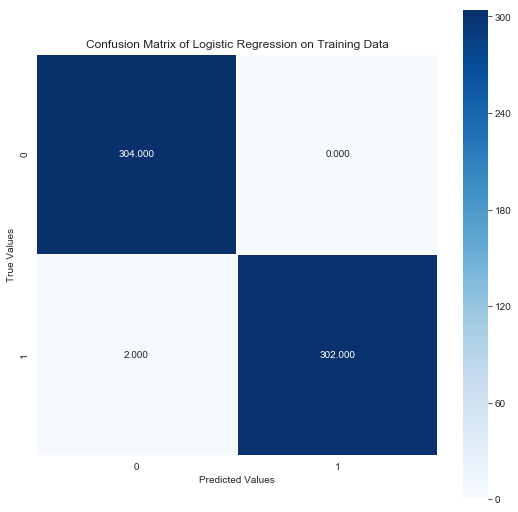

In [169]:
#confusion matrix visualization of train data
cm_lr = confusion_matrix(y_train, smote_pred_train)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Confusion Matrix of Logistic Regression on Training Data')

In [122]:
#Predictions and Evaluations
smote_pred_test = smote_lr.predict(X_test)
print(classification_report(y_test, smote_pred_test))

              precision    recall  f1-score   support

           0       0.33      0.50      0.40         2
           1       0.99      0.97      0.98        77

   micro avg       0.96      0.96      0.96        79
   macro avg       0.66      0.74      0.69        79
weighted avg       0.97      0.96      0.97        79



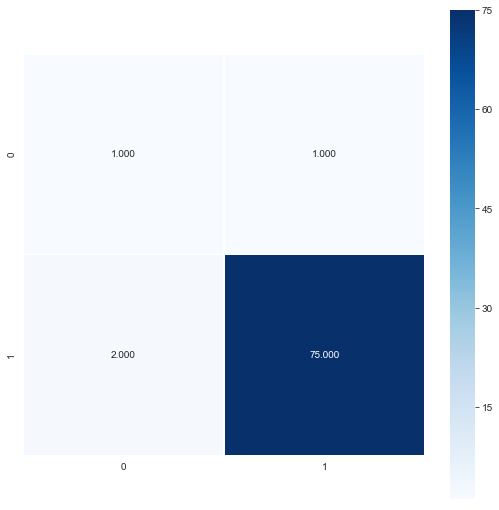

In [123]:
#confusion matrix visualization of test data
cm_lr = confusion_matrix(y_test, smote_pred_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [168]:
# Model F1 Scores Comparison
print('Training Accuracy Score:', accuracy_score(y_train, smote_pred_train))
print('Training F1 Score:', f1_score(y_train, smote_pred_train))

print('Testing F1 Score:', f1_score(y_test, smote_pred_test))
print('Testing Accuracy Score:', accuracy_score(y_train, smote_pred_train))

Training Accuracy Score: 0.9967105263157895
Training F1 Score: 0.9966996699669968
Testing F1 Score: 0.9803921568627451
Testing Accuracy Score: 0.9967105263157895


In [127]:
# pickling model
pickle_model('smote_log2', smote_lr)

In [128]:
# open pickled model and set to a variable
smote_lr2_pkl = open('./EDA2_smote_log2.pkl', 'rb')
log_smote2 = pickle.load(smote_lr2_pkl)

In [129]:
# print pickled model info
print("Loaded Log Reg Pickle :: ", log_smote2)

Loaded Log Reg Pickle ::  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)


#### Decision Tree Model 2

In [130]:
# create a Decision Tree instance
smote_dt2 = DecisionTreeClassifier()

In [131]:
# fit the model to the training data
smote_dtree2 = smote_dt2.fit(X_train, y_train)

In [132]:
# use model to predict off training data
smote_dt_pred_train2 = smote_dtree2.predict(X_train)

In [133]:
print(confusion_matrix(y_train, smote_dt_pred_train2))
print(classification_report(y_train, smote_dt_pred_train2))

[[304   0]
 [  0 304]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       1.00      1.00      1.00       304

   micro avg       1.00      1.00      1.00       608
   macro avg       1.00      1.00      1.00       608
weighted avg       1.00      1.00      1.00       608



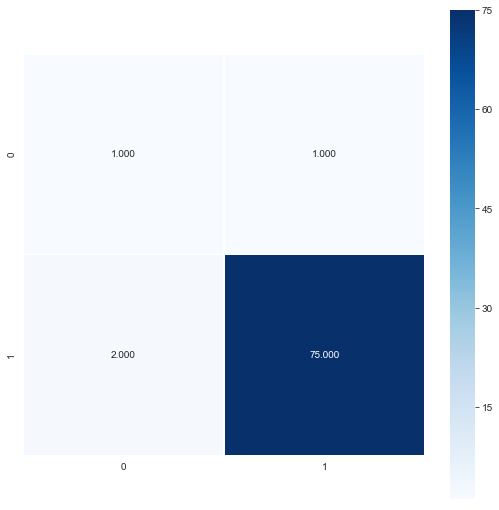

In [134]:
#confusion matrix visualization of train data
cm_dt2 = confusion_matrix(y_train, smote_dt_pred_train2)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [135]:
# use model to predict off test data
smote_dt_pred_test2 = smote_dtree2.predict(X_test)

In [136]:
print(confusion_matrix(y_test, smote_dt_pred_test2))
print(classification_report(y_test, smote_dt_pred_test2))

[[ 0  2]
 [ 3 74]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.97      0.96      0.97        77

   micro avg       0.94      0.94      0.94        79
   macro avg       0.49      0.48      0.48        79
weighted avg       0.95      0.94      0.94        79



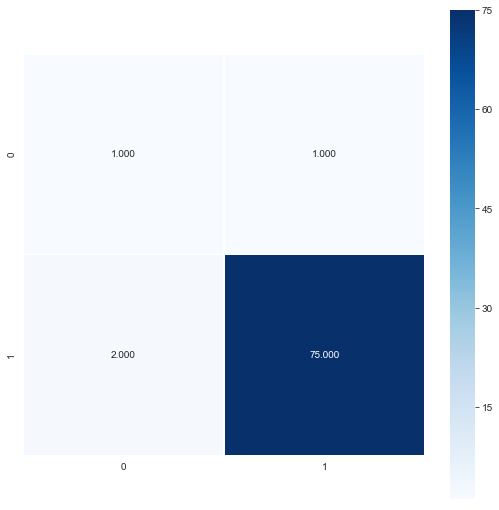

In [137]:
#confusion matrix visualization of train data
cm_dt2 = confusion_matrix(y_test, smote_dt_pred_test2)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [138]:
# Model F1 Scores Comparison
print('Training F1 Score:', f1_score(y_train, smote_dt_pred_train2))
print('Testing F1 Score:', f1_score(y_test, smote_dt_pred_test2))

Training F1 Score: 1.0
Testing F1 Score: 0.9673202614379085


In [141]:
# pickling model
pickle_model('smote_dt2', smote_dtree2)

In [142]:
# open pickled model and set to a variable
dtree_smote2_pkl = open('./EDA2_smote_dt2.pkl', 'rb')
dtree_smote2 = pickle.load(dtree_smote2_pkl)

In [143]:
# print pickled model info
print("Loaded Decision Tree Pickle :: ", dtree_smote2)

Loaded Decision Tree Pickle ::  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


#### Decision Tree Model 1

In [144]:
# create a Decision Tree instance
smote_dt = DecisionTreeClassifier(max_depth=5)

In [145]:
# fit the model to the training data
smote_dtree = smote_dt.fit(X_train, y_train)

In [146]:
# fit the model to the training data
smote_dtree = smote_dt.fit(X_train, y_train)

In [147]:
# use model to predict off training data
smote_dt_pred_train = smote_dtree.predict(X_train)

In [148]:
print(confusion_matrix(y_train, smote_dt_pred_train))
print(classification_report(y_train, smote_dt_pred_train))

[[304   0]
 [  0 304]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       304
           1       1.00      1.00      1.00       304

   micro avg       1.00      1.00      1.00       608
   macro avg       1.00      1.00      1.00       608
weighted avg       1.00      1.00      1.00       608



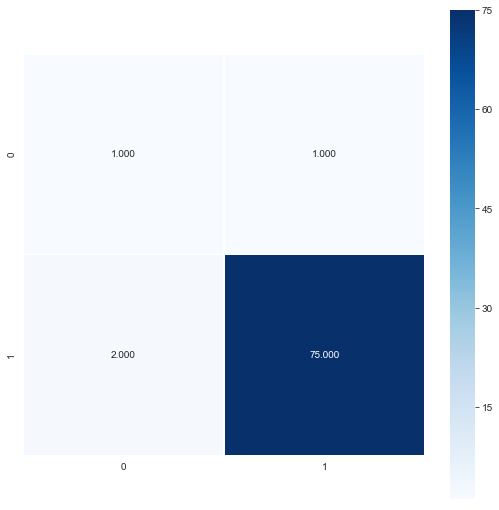

In [149]:
#confusion matrix visualization of train data
cm_dt = confusion_matrix(y_train, smote_dt_pred_train)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [150]:
# use model to predict off test data
smote_dt_pred_test = smote_dtree.predict(X_test)

In [151]:
print(confusion_matrix(y_test, smote_dt_pred_test))
print(classification_report(y_test, smote_dt_pred_test))

[[ 0  2]
 [ 2 75]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.97      0.97      0.97        77

   micro avg       0.95      0.95      0.95        79
   macro avg       0.49      0.49      0.49        79
weighted avg       0.95      0.95      0.95        79



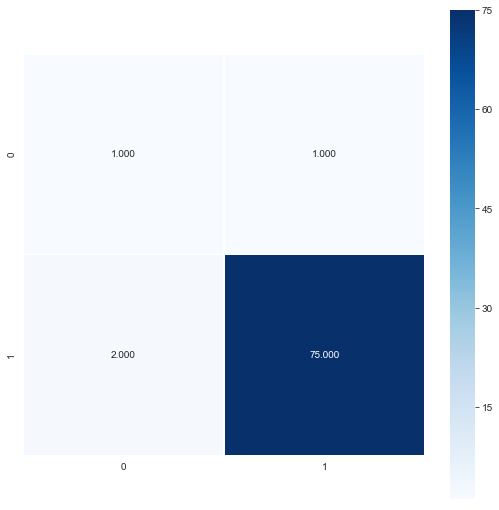

In [152]:
#confusion matrix visualization of train data
cm_dt = confusion_matrix(y_test, smote_dt_pred_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [153]:
# Model F1 Scores Comparison
print('Training F1 Score:', f1_score(y_train, smote_dt_pred_train))
print('Testing F1 Score:', f1_score(y_test, smote_dt_pred_test))

Training F1 Score: 1.0
Testing F1 Score: 0.974025974025974


In [154]:
# pickling model
pickle_model('smote_dt', smote_dtree)

In [155]:
# open pickled model and set to a variable
dtree_smote_pkl = open('./EDA2_smote_dt.pkl', 'rb')
dtree_smote = pickle.load(dtree_smote_pkl)

In [156]:
# print pickled model info
print("Loaded Decision Tree Pickle :: ", dtree_smote)

Loaded Decision Tree Pickle ::  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


#### KNN

In [157]:
# instantiate KNN model
knn = KNeighborsClassifier()

In [158]:
# Fit this KNN model to the training data.
smote_knn = knn.fit(X_train, y_train)

In [159]:
# predict on training data
smote_knn_pred_train = smote_knn.predict(X_train)

In [160]:
print(confusion_matrix(y_train, smote_knn_pred_train))
print(classification_report(y_train, smote_knn_pred_train))

[[290  14]
 [ 42 262]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       304
           1       0.95      0.86      0.90       304

   micro avg       0.91      0.91      0.91       608
   macro avg       0.91      0.91      0.91       608
weighted avg       0.91      0.91      0.91       608



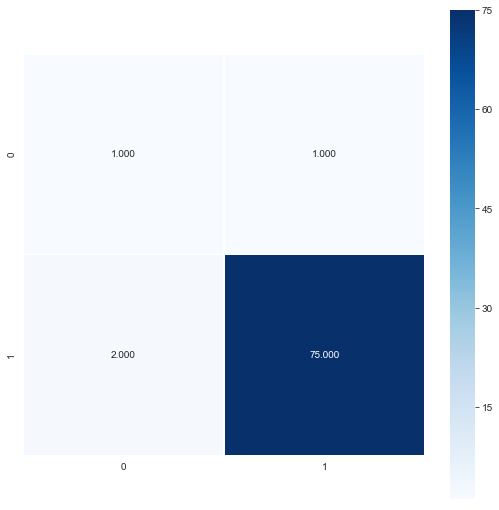

In [161]:
#confusion matrix visualization of train data
cm_knn = confusion_matrix(y_train, smote_knn_pred_train)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [162]:
#Predictions and Evaluations

smote_knn_pred_test = smote_knn.predict(X_test)
print(confusion_matrix(y_test, smote_knn_pred_test))
print(classification_report(y_test, smote_knn_pred_test))

[[ 1  1]
 [13 64]]
              precision    recall  f1-score   support

           0       0.07      0.50      0.12         2
           1       0.98      0.83      0.90        77

   micro avg       0.82      0.82      0.82        79
   macro avg       0.53      0.67      0.51        79
weighted avg       0.96      0.82      0.88        79



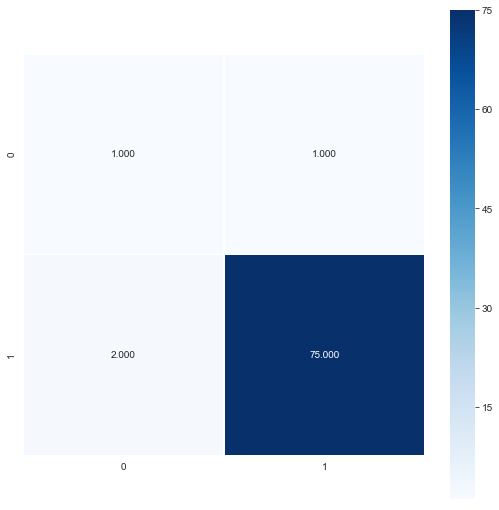

In [163]:
#confusion matrix visualization of train data
cm_knn = confusion_matrix(y_test, smote_knn_pred_test)

plt.figure(figsize = (9, 9))
sns.heatmap(cm_lr, annot = True, fmt = ".3f", linewidths = .5, square = True, cmap = plt.cm.Blues)

In [164]:
# Model F1 Score Comparison
print('Training F1 Score:', f1_score(y_train, smote_knn_pred_train))
print('Testing F1 Score:', f1_score(y_test, smote_knn_pred_test))

Training F1 Score: 0.903448275862069
Testing F1 Score: 0.9014084507042254


In [165]:
# pickling model
pickle_model('knn_smote', smote_knn)

In [166]:
# open pickled model and set to a variable
smote_knn_pkl = open('./EDA2_knn_smote.pkl', 'rb')
knn_smote = pickle.load(smote_knn_pkl)

In [167]:
# print pickled model info
print("Loaded KNN Pickle :: ", knn_smote)

Loaded KNN Pickle ::  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
